In [42]:
'''pip install keras
pip install tensorflow
pip install --upgrade keras tensorflow
pip install Pillow
pip install matplotlib'''

Note: you may need to restart the kernel to use updated packages.


**Importing Libraries**

In [47]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

**Perprocessing**

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [49]:
training_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [50]:
testing_data_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [51]:
training_dataset = training_data_generator.flow_from_directory(
    'Covid-19/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [52]:
testing_dataset = testing_data_generator.flow_from_directory(
    'Covid-19/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 66 images belonging to 3 classes.


**DataSet**


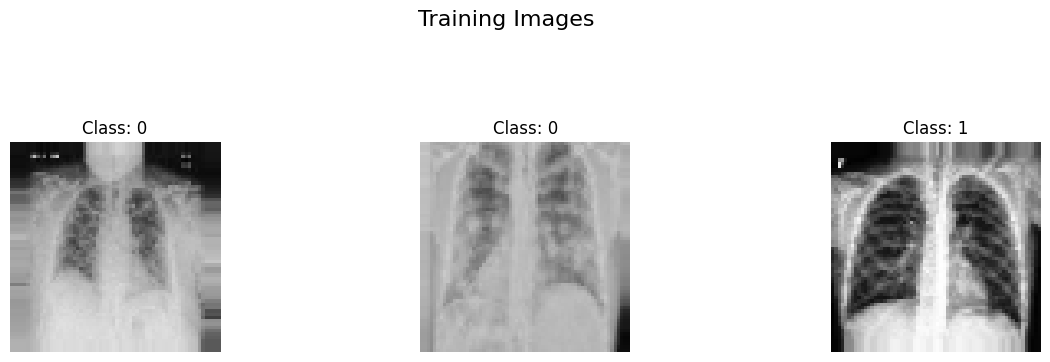

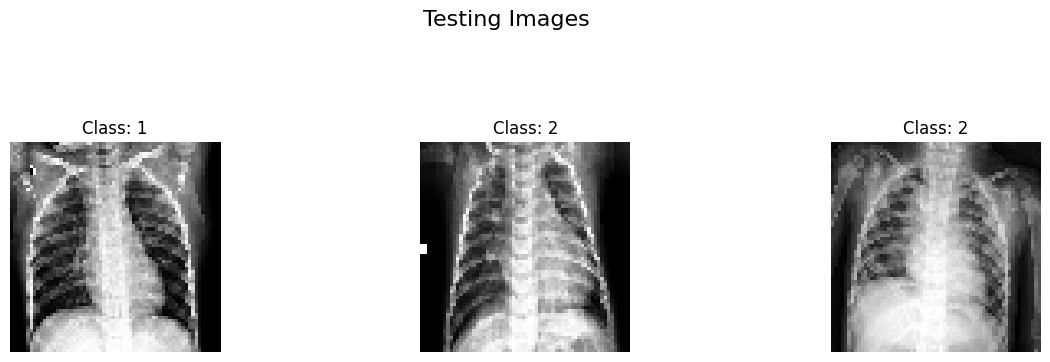

In [53]:
def display_images(dataset_generator, num_images, dataset_type):
    # Get a batch of images from the generator
    images, labels = next(dataset_generator)

    # Plot the images
    plt.figure(figsize=(15, 6))
    plt.suptitle(f"{dataset_type} Images", fontsize=16, y=1.1)
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i].argmax()}")  # Assuming one-hot encoding for labels
        plt.axis("off")
    plt.show()

# Display training images
display_images(training_dataset, 3, 'Training')

# Display testing images
display_images(testing_dataset, 3, 'Testing')


**CNN_Model**

In [54]:
classifier = Sequential()
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(16,(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units= 128, activation='relu'))
classifier.add(Dense(units= 3, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
classifier.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,443 (1.55 MB)

 Trainable params: 407,443 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

**Training**

In [56]:
history = classifier.fit(
    training_dataset,
    steps_per_epoch=int(251/32),
    epochs=25,
    validation_data=testing_dataset,
    validation_steps= int(66/32)
)

Epoch 1/25


c:\Users\THINKPAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.3547 - loss: 1.1215 - val_accuracy: 0.6562 - val_loss: 1.0621
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 1.0710 - val_accuracy: 0.5000 - val_loss: 1.0828
Epoch 3/25


c:\Users\THINKPAD\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.6028 - loss: 1.0277 - val_accuracy: 0.7969 - val_loss: 0.7972
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.8476 - val_accuracy: 1.0000 - val_loss: 0.8669
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6498 - loss: 0.7935 - val_accuracy: 0.7812 - val_loss: 0.5358
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.5450 - val_accuracy: 0.5000 - val_loss: 0.6615
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7801 - loss: 0.5128 - val_accuracy: 0.7031 - val_loss: 0.6542
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.5059 - val_accuracy: 0.0000e+00 - val_loss: 1.4079
Epoch 9/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8141 - loss: 0.4327 - val_accuracy: 0.8750 - val_loss: 0.3563
Epoch 10/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.3026 - val_accuracy: 0.5000 - val_loss: 0.7275
Epoch 

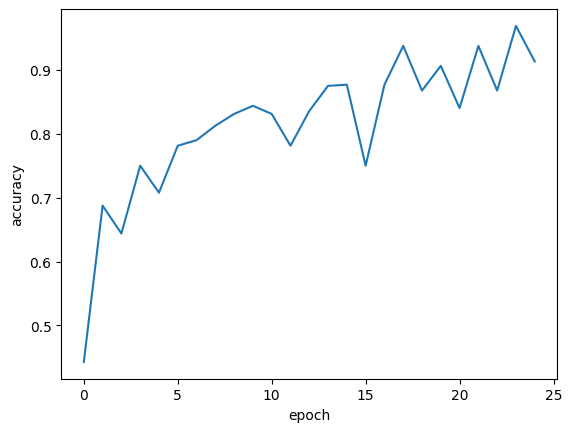

In [59]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

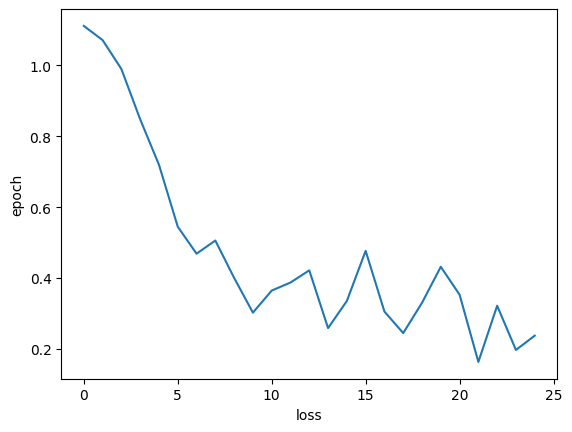

In [60]:
plt.plot(history.history['loss'])
plt.ylabel('epoch')
plt.xlabel('loss')
plt.show

In [57]:
# Evaluate on training set
loss, accuracy_train = classifier.evaluate(training_dataset, verbose=0)
print(f"Training Accuracy: {accuracy_train}")

# Evaluate on testing set
loss, accuracy_test = classifier.evaluate(testing_dataset, verbose=0)
print(f"Test Accuracy: {accuracy_test}")

Training Accuracy: 0.9083665609359741
Test Accuracy: 0.9242424368858337


**Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


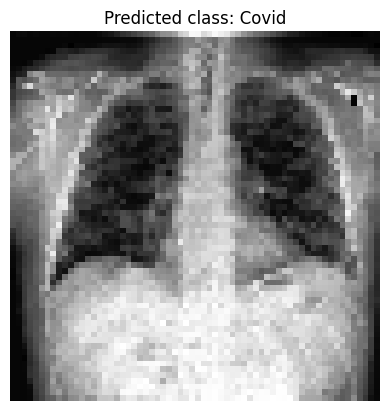

In [58]:
img_path = r'Covid-19\test\Covid\0100.jpeg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image as per training data

# Predict the class label using the ResNet50 model
prediction_cnn = classifier.predict(img_array)
predicted_class_cnn = np.argmax(prediction_cnn)
class_labels = ["Covid", "Normal", "Viral Pneumonia"]
predicted_label_resnet50 = class_labels[predicted_class_cnn]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Predicted class: " + predicted_label_resnet50)  # Add title with predicted label
plt.show()